## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combo_data = mouse_metadata.merge(study_results, how='outer', on='Mouse ID' )

# mouse_metadata.columns
# ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']

# study_results.columns
# ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']

# Display the data table for preview
combo_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combo_data["Mouse ID"]

df = combo_data['Mouse ID'].nunique()
print(f"The number of unique Mice is {df}")


The number of unique Mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combo_data["Duplicated"] = combo_data[["Mouse ID","Timepoint"]].duplicated()
dup_data = combo_data.loc[combo_data['Duplicated'] == True]
dup_data[["Mouse ID"]].head(1)


,Mouse ID
909,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

u_data = combo_data[combo_data["Mouse ID"]=="g989"]
u_data
n_data = combo_data[combo_data["Mouse ID"]!= "g989"]
n_data

t = n_data["Mouse ID"].nunique()

In [6]:
# Checking the number of mice in the clean DataFrame.

print(f"The number of unique Mice is {t}")

The number of unique Mice is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
g_data = n_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.

Sum_df = pd.DataFrame({"Mean": g_data["Tumor Volume (mm3)"].mean(),
                       "Median": g_data["Tumor Volume (mm3)"].median(),
                       "Varience": g_data["Tumor Volume (mm3)"].var(),
                       "Standard Deviation": g_data["Tumor Volume (mm3)"].std(),
                       "SEM": g_data["Tumor Volume (mm3)"].sem(),})
Sum_df


,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

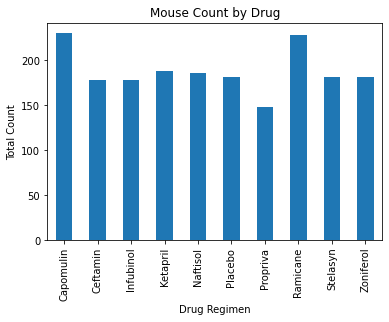

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measures_df = pd.DataFrame({"Measurements": g_data["Tumor Volume (mm3)"].count()})
measures_df.plot(kind="bar",legend=None)
plt.title("Mouse Count by Drug")
plt.ylabel("Total Count")
plt.show()


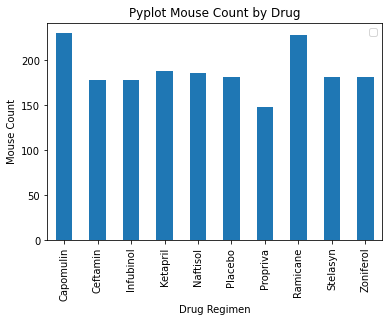

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measures_df = pd.DataFrame({"Measurements": g_data["Tumor Volume (mm3)"].count()})
measures_df.plot(kind="bar")
plt.title("Pyplot Mouse Count by Drug")
plt.legend([])
plt.ylabel("Mouse Count")
plt.show()

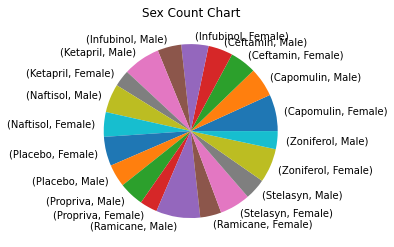

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_df = pd.DataFrame({"": g_data["Sex"].value_counts()})

sex_df.plot(kind='pie',subplots=True,legend=None)
plt.title("Sex Count Chart")
plt.show()

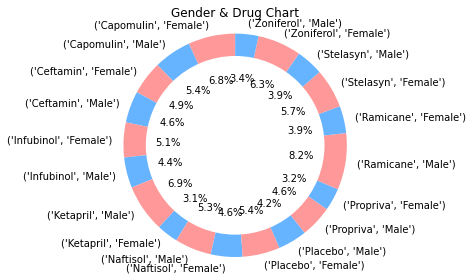

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Pie chart
labels = sex_df.index
sizes = sex_df[""]
#colors
colors = ['#ff9999','#66b3ff']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.title("Gender & Drug Chart")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

trim = n_data[n_data['Drug Regimen'].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]


mouse = trim[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]]
mice = mouse.groupby("Mouse ID").max()

mice.drop(columns=["Timepoint"],inplace=True)
mice
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,45.466677
a444,Ramicane,45.000000
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,45.000000
y865,Ceftamin,64.729837


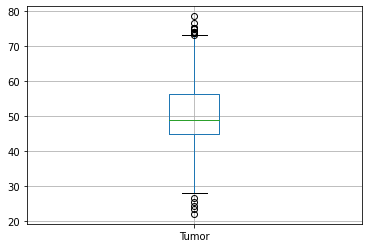

The lower quartiles are: Capomulin:37.69, Ramicane: 36.67, Infubinol: 47.31, Ceftamin: 47.21
The upper quartiles are: Capomulin:45.0, Ramicane: 45.0, Infubinol: 57.31, Ceftamin: 56.8
Values below Capomulin:26.72, Ramicane: 24.18, Infubinol: 32.31, Ceftamin: 32.83 could be outliers.
Values above Capomulin:55.96, Ramicane: 57.5, Infubinol: 72.31, Ceftamin: 71.18 could be outliers.


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

u_data = n_data['Drug Regimen']

treatments = []
for x in u_data:
    treatments.append(x)


# Create empty list to fill with tumor vol data (for plotting)
tumor = []

for x in n_data["Tumor Volume (mm3)"]:
    tumor.append(x)
tumor_df = pd.DataFrame({"Tumor":tumor})

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_df.boxplot()
plt.show()
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
Capomulin_df = n_data[n_data['Drug Regimen'] == "Capomulin"] 
Capomulin_dft = Capomulin_df["Tumor Volume (mm3)"]
Capomulin_dft = Capomulin_df.reset_index()
Capomulin_quan = Capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)

Ramicane_df = n_data[n_data['Drug Regimen'] == "Ramicane"] 
Ramicane_dft = Ramicane_df["Tumor Volume (mm3)"]
Ramicane_dft = Ramicane_df.reset_index()
Ramicane_quan = Ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)

Infubinol_df = n_data[n_data['Drug Regimen'] == "Infubinol"] 
Infubinol_dft = Infubinol_df["Tumor Volume (mm3)"]
Infubinol_dft = Infubinol_df.reset_index()
Infubinol_quan = Infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)

Ceftamin_df = n_data[n_data['Drug Regimen'] == "Ceftamin"] 
Ceftamin_dft = Ceftamin_df["Tumor Volume (mm3)"]
Ceftamin_dft = Ceftamin_df.reset_index()
Ceftamin_quan = Ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)
    
# Determine outliers using upper and lower bounds

lowerq1 = Capomulin_quan[0.25]
upperq1 = Capomulin_quan[0.75]
iqr1 = upperq1-lowerq1


lowerq2 = Ramicane_quan[0.25]
upperq2 = Ramicane_quan[0.75]
iqr2 = upperq2-lowerq2


lowerq3 = Infubinol_quan[0.25]
upperq3 = Infubinol_quan[0.75]
iqr3 = upperq3-lowerq3


lowerq4 = Ceftamin_quan[0.25]
upperq4 = Ceftamin_quan[0.75]
iqr4 = upperq4-lowerq4


print(f"The lower quartiles are: Capomulin:{round(lowerq1,2)}, Ramicane: {round(lowerq2,2)}, Infubinol: {round(lowerq3,2)}, Ceftamin: {round(lowerq4,2)}")
print(f"The upper quartiles are: Capomulin:{round(upperq1,2)}, Ramicane: {round(upperq2,2)}, Infubinol: {round(upperq3,2)}, Ceftamin: {round(upperq4,2)}")


lower_bound1 = lowerq1 - (1.5*iqr1)
lower_bound2 = lowerq2 - (1.5*iqr2)
lower_bound3 = lowerq3 - (1.5*iqr3)
lower_bound4 = lowerq4 - (1.5*iqr4)

upper_bound1 = upperq1 + (1.5*iqr1)
upper_bound2 = upperq2 + (1.5*iqr2)
upper_bound3 = upperq3 + (1.5*iqr3)
upper_bound4 = upperq4 + (1.5*iqr4)

lower_bound1
lower_bound2
lower_bound3
lower_bound4

upper_bound1
upper_bound2
upper_bound3
upper_bound4



print(f"Values below Capomulin:{round(lower_bound1,2)}, Ramicane: {round(lower_bound2,2)}, Infubinol: {round(lower_bound3,2)}, Ceftamin: {round(lower_bound4,2)} could be outliers.")
print(f"Values above Capomulin:{round(upper_bound1,2)}, Ramicane: {round(upper_bound2,2)}, Infubinol: {round(upper_bound3,2)}, Ceftamin: {round(upper_bound4,2)} could be outliers.") 
    
    

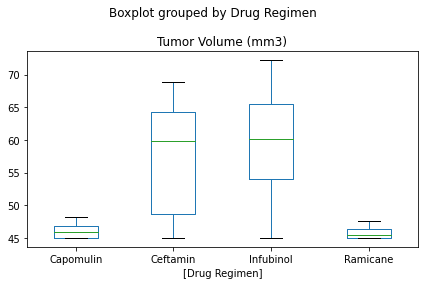

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

d_df = mouse.groupby("Mouse ID").max()

d_df[["Tumor Volume (mm3)","Drug Regimen"]]

# Capomulin_tum = d_df[d_df["Drug Regimen"]=="Capomulin"]
# Ramicane_tum = d_df[d_df["Drug Regimen"]=="Ramicane"]
# Infubinol_tum = d_df[d_df["Drug Regimen"]=="Infubinol"]
# Ceftamin_tum = d_df[d_df["Drug Regimen"]=="Ceftamin"]


# sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(10,10))

# sns.boxplot(data=Capomulin_tum,showmeans=True)
# sns.boxplot(data=Ramicane_tum,showmeans=True)
# sns.boxplot(data=Infubinol_tum,showmeans=True)
# sns.boxplot(data=Ceftamin_tum,showmeans=True)

d_df.boxplot(column=['Tumor Volume (mm3)'], by=['Drug Regimen'])
plt.tight_layout()
plt.grid()
plt.show()




## Line and Scatter Plots

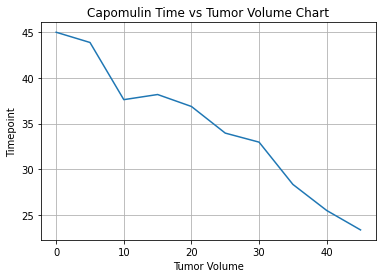

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_df = Capomulin_df[Capomulin_df["Mouse ID"]=="s185"]
tum = mouse_df["Tumor Volume (mm3)"]
time = mouse_df["Timepoint"]
plt.plot(time,tum)
plt.title("Capomulin Time vs Tumor Volume Chart")
plt.xlabel("Tumor Volume")
plt.ylabel("Timepoint")
plt.grid()
plt.show()


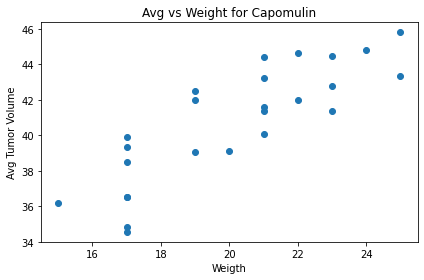

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

c_df = Capomulin_df.groupby(["Mouse ID"]).mean()

cp_df = c_df.drop(columns=["Age_months","Timepoint","Metastatic Sites","Duplicated"])

w = cp_df["Weight (g)"]
t = cp_df["Tumor Volume (mm3)"]

plt.scatter(w,t)
plt.title("Avg vs Weight for Capomulin")
plt.xlabel("Weigth")
plt.ylabel("Avg Tumor Volume")
plt.tight_layout()
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

res = stats.linregress(w, t)
print(f"R-squared from the Linear Regression is: {res.rvalue**2:.6f}")

cc = st.pearsonr(w,t)
print(f"The correlation between both factors is: {round(cc[0],2)}")

R-squared from the Linear Regression is: 0.708857
The correlation between both factors is: 0.84
